In [1]:
from dasquakes import *
import datetime
import numpy as np

# 1. Choose the following parameters to select data to examine

In [29]:
cable='seadasn'
record_length = 30 #minutes
t0 = datetime.datetime(2022, 11, 9, 4, 41, 0)

# 2. Run the functions to return the data

In [30]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [31]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 180000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


# 4. Make a simple plot of the data

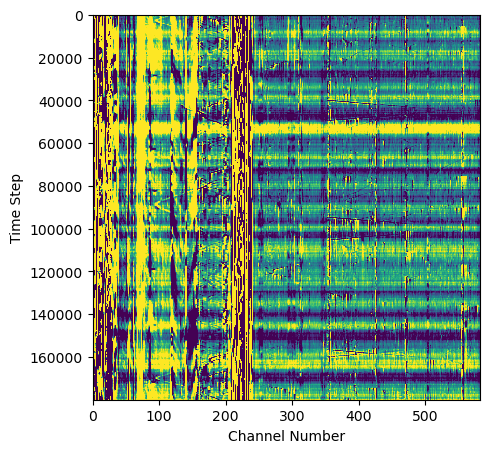

In [58]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
plt.imshow(data,aspect='auto',vmin=-0.5,vmax=0.5)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,582])
plt.show()

# Data filter

In [52]:
#pass band
from scipy.signal import butter, filtfilt
#defining outputs
b,a = butter(2,[1,10],'bandpass',fs=attrs['MaximumFrequency']*2)
datafilter=filtfilt(b,a,data[::20,:],axis=0)


# Plot Filter

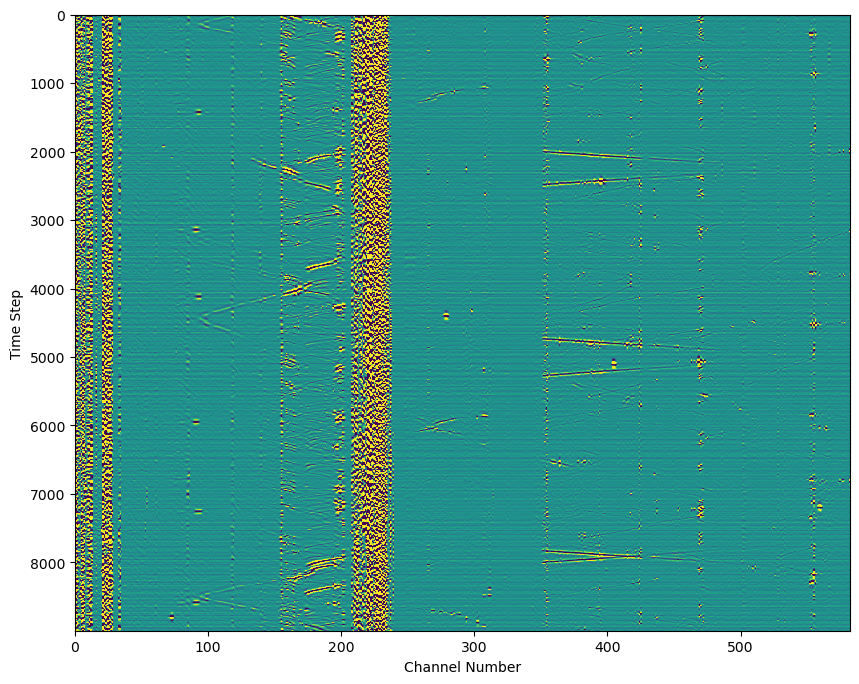

In [57]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(datafilter, aspect='auto', vmin=-0.5, vmax=0.5)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,582])
plt.show()

# zoom for one parabole

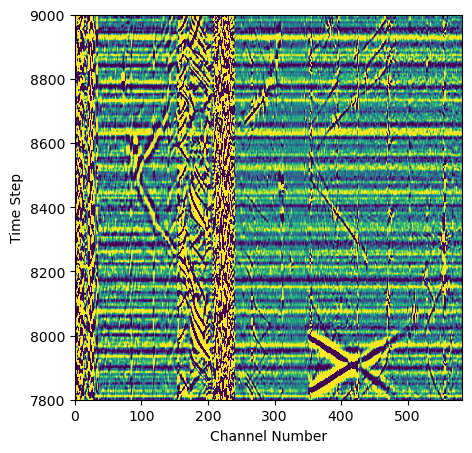

In [60]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(5,5))
plt.imshow(datafilter, aspect='auto', vmin=-0.1, vmax=0.1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,582])
plt.ylim([7800, 9000])
plt.show()

# Marathon day


In [42]:
cable='seadasn'
record_length = 10 #minutes
t0 = datetime.datetime(2022, 11, 25, 9, 0, 0)
#no record this day

In [43]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

ValueError: Why are there ZERO files? That shouldn't be possible!